In [56]:
# import packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches
import itertools
from matplotlib.ticker import AutoMinorLocator

In [57]:
# settings
sns.set_style("darkgrid")
ID = "0620"
figure_path = "figs" + os.sep + ID + os.sep

if not os.path.exists(figure_path):
    os.makedirs(figure_path)

In [58]:
# Here we load the data
directory = "../results/results_" + ID + "_main"
idx = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if not filename.endswith(".csv"):
        continue
    newdata = pd.read_csv(f, index_col = None)
    if idx == 0:
        data = newdata
    else:
        data = pd.concat([data, newdata], ignore_index=True)
    idx += 1

full_data = data.copy(deep=True)
data = data.loc[(data["init_canSendMessages"] == False) & (data["resp_canSendMessages"] == False)]

In [59]:
# figure settings
INIT_COL = sns.color_palette('colorblind')[0]
RESP_COL = sns.color_palette('colorblind')[1]

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='Score gain', ylabel='Agent type'>)

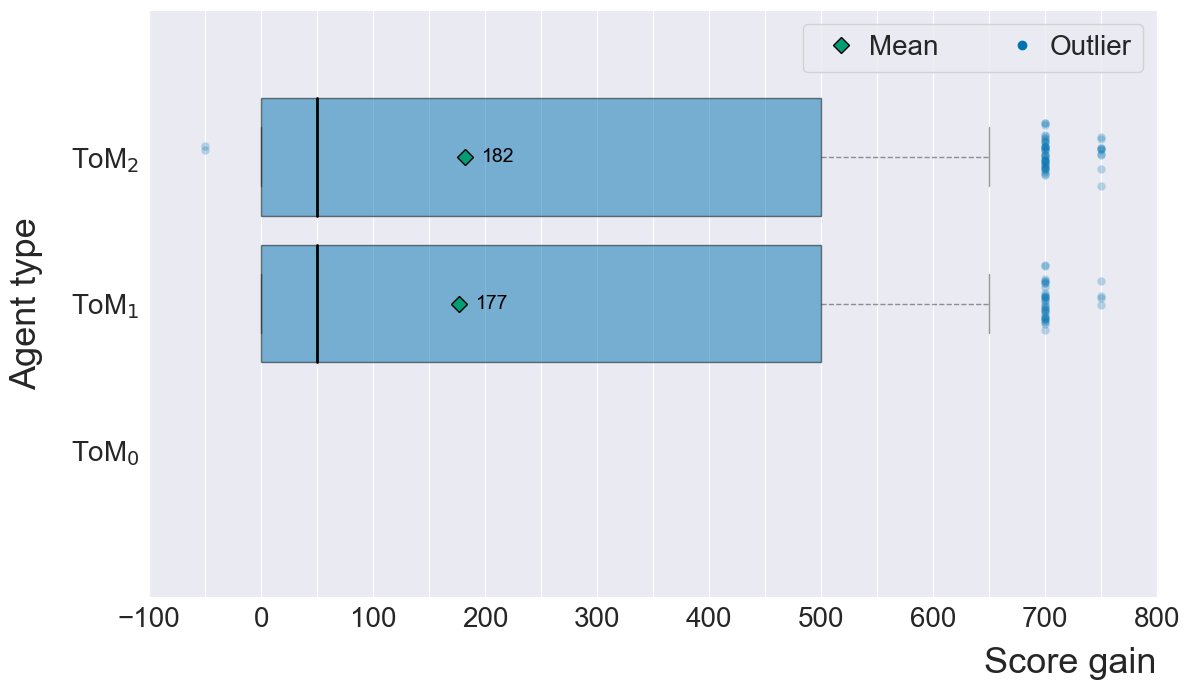

In [60]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4

fig_label_names = [r"ToM$_0$",
                   r"ToM$_1$",
                   r"ToM$_2$"]

plot_points = [(0, 0), (0.5, 1), (1, 2)]
figsize = (12, 7)

def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    
    top_points = bp["fliers"][0].get_data()
    x = top_points[0]
    y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
    ax.scatter(x, y, color=INIT_COL, alpha=0.25, linewidth=0)
        

def create_boxplot_figure(df):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom in plot_points:
        plot_data = list(df[(df["init_tom"] == tom)]["init_gain"])
        plot_data.extend(list(df[(df["resp_tom"] == tom)]["resp_gain"]))
        make_box_plot(plot_data, [pos], ax)
        
        if plot_data:
            mean_value = np.mean(plot_data)
            plt.text(mean_value+15, pos, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",

    y_ticks = [i for i, _ in plot_points]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 0.5))
    
    ax.legend((plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color=INIT_COL, marker="o", linewidth=0)),
              ("Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    ax.set_xlabel('Score gain', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    return fig, ax

create_boxplot_figure(data)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='Score gain', ylabel='Agent type'>)

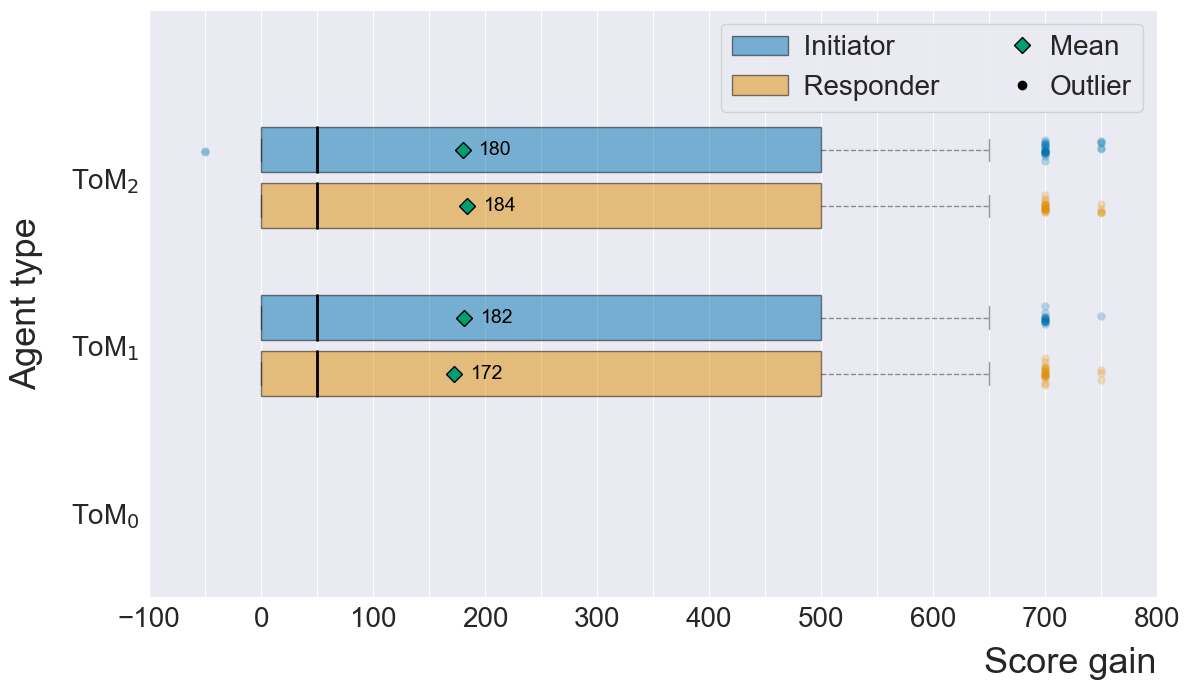

In [61]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25

fig_label_names = [r"ToM$_0$",
                   r"ToM$_1$",
                   r"ToM$_2$"]

plot_points = [(0, 0), (1.5, 1), (3, 2)]
figsize = (12, 7)

def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        plt.setp(bp[element][1], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    plt.setp(bp['fliers'][1], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    bp['boxes'][1].set(facecolor=RESP_COL)
    
    fill_colors = [INIT_COL, RESP_COL]
    for i in [0,1]:
        top_points = bp["fliers"][i].get_data()
        x = top_points[0]
        y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
        ax.scatter(x, y, color=fill_colors[i], alpha=0.25, linewidth=0)
        

def create_boxplot_figure(df):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom in plot_points:
        plot_data = [list(df[(df["init_tom"] == tom)]["init_gain"]),
                     list(df[(df["resp_tom"] == tom)]["resp_gain"])]
        make_box_plot(plot_data, [pos+INNER_HALFSPACE, pos-INNER_HALFSPACE], ax)
        
        if plot_data[0]:
            mean_value = np.mean(plot_data[0])
            plt.text(mean_value+15, pos+INNER_HALFSPACE, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",

            mean_value = np.mean(plot_data[1])
            plt.text(mean_value+15, pos-INNER_HALFSPACE, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",
        
    y_ticks = [i for i, _ in plot_points]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 1.5))
    
    ax.legend((mpatches.Patch(facecolor=INIT_COL, edgecolor='black', label="Initiator", alpha=boxprops["alpha"]),
               mpatches.Patch(facecolor=RESP_COL, edgecolor='black', label="Responder", alpha=boxprops["alpha"]),
               plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
              ("  Initiator", "  Responder", "Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    ax.set_xlabel('Score gain', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    return fig, ax

create_boxplot_figure(data)

In [62]:
work_data = data.copy()
work_data = work_data.loc[(work_data["init_gain"] >= 0) & (work_data["resp_gain"] >= 0) & (work_data["init_gain"] + work_data["resp_gain"] > 0)]
print(f'Percentage of data points where both gains are greater than or equal to zero and the sum is greater than zero: {len(work_data) / len(data)}')
work_data["init_percentGain"] = work_data.apply(lambda x: x["init_gain"] / (x["init_gain"] + x["resp_gain"]), axis=1)
work_data["resp_percentGain"] = work_data.apply(lambda x: x["resp_gain"] / (x["init_gain"] + x["resp_gain"]), axis=1)

Percentage of data points where both gains are greater than or equal to zero and the sum is greater than zero: 0.5455689828801611


c:\Users\sverr\Documents\Universiteit\Master thesis\Code\MasterThesis\py_src\myenv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sverr\Documents\Universiteit\Master thesis\Code\MasterThesis\py_src\myenv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


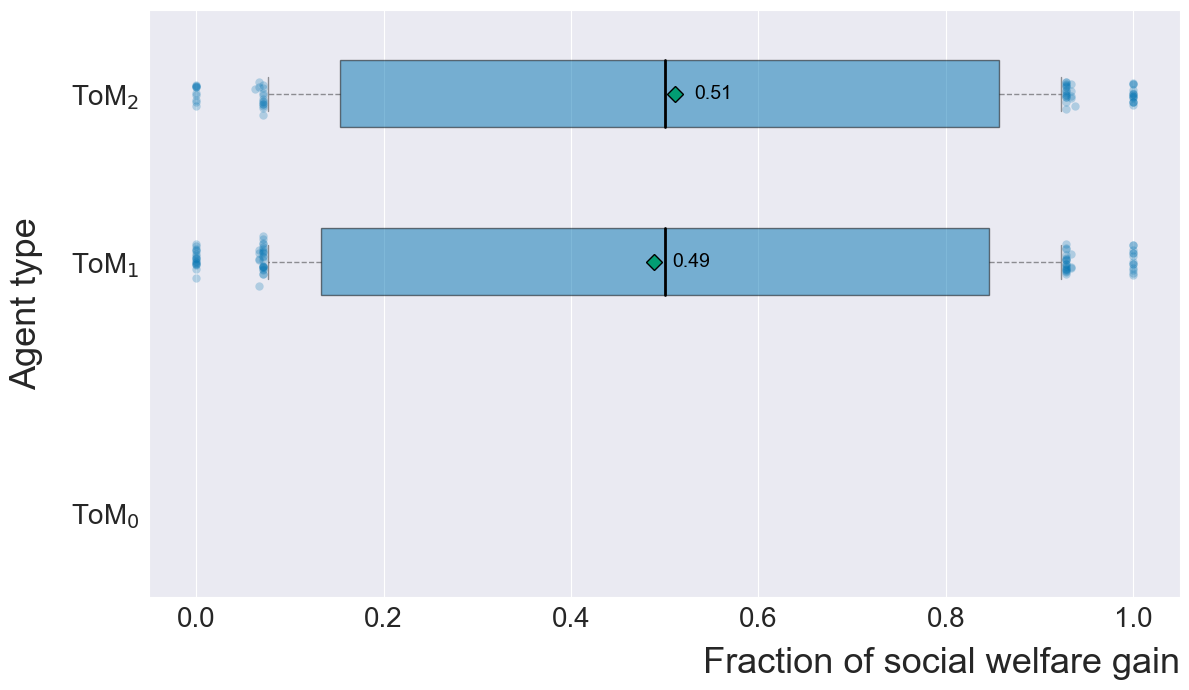

In [63]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25

plot_points = [(0, 0), (1.5, 1), (2.5, 2)]
fig_label_names = [r"ToM$_0$",
                   r"ToM$_1$",
                   r"ToM$_2$"]

figsize = (12, 7)

# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    
    top_points = bp["fliers"][0].get_data()
    x = top_points[0]
    y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
    ax.scatter(x, y, color=INIT_COL, alpha=0.25, linewidth=0)
    
    
# function for setting the colors of the box plots pairs
def make_plot(data):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom in plot_points:
        plot_data = list(data[(data["init_tom"] == tom)]["init_percentGain"])
        plot_data.extend(list(data[(data["resp_tom"] == tom)]["resp_percentGain"]))
        make_box_plot(plot_data, [pos], ax)
        
        mean_value = np.mean(plot_data)
        plt.text(mean_value+0.02, pos, str(round((mean_value),2)), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",
        
    ax.set_xlim(right=1.05, left=-0.05)
    
    ax.yaxis.grid(False)
    ax.xaxis.grid(True, which="both")
    
    y_labels = [r"ToM$_0$",
                r"ToM$_1$",
                r"ToM$_2$"]
    
    ax.set_yticklabels(y_labels)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    ax.set_xlabel("Fraction of social welfare gain", fontsize=LABEL_SIZE, loc="right", labelpad=10)
    
    fig.tight_layout()

make_plot(work_data)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='Nr. of offers in negotiation round', ylabel='Agent type'>)

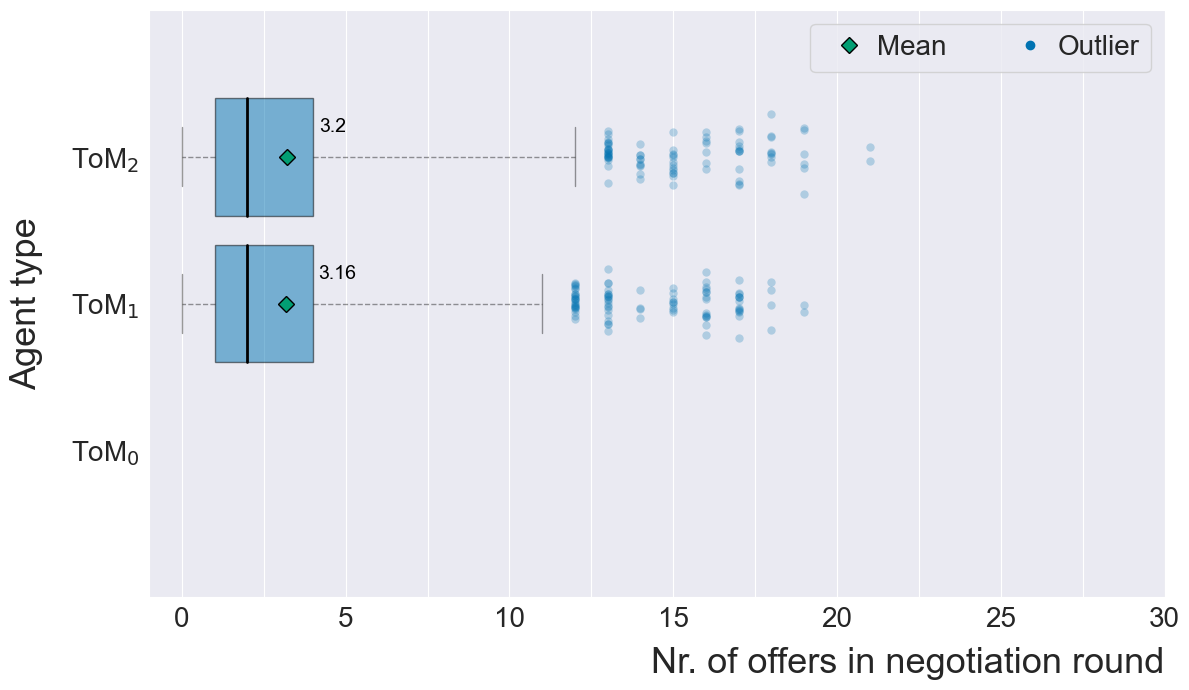

In [64]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 100
LEFT_LIM = -1

BIN_WIDTH = 0.4

fig_label_names = [r"ToM$_0$",
                   r"ToM$_1$",
                   r"ToM$_2$"]

plot_points = [(0, 0), (0.5, 1), (1, 2)]
figsize = (12, 7)

def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    
    top_points = bp["fliers"][0].get_data()
    x = top_points[0]
    y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
    ax.scatter(x, y, color=INIT_COL, alpha=0.25, linewidth=0)
        

def create_boxplot_figure(df):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom in plot_points:
        plot_data = list(df[(df["init_tom"] == tom)]["nr_offers"])
        plot_data.extend(list(df[(df["resp_tom"] == tom)]["nr_offers"]))
        make_box_plot(plot_data, [pos], ax)
        
        if plot_data:
            mean_value = np.mean(plot_data)
            plt.text(mean_value+1, pos+0.1, str(round((mean_value), 2)), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",

    y_ticks = [i for i, _ in plot_points]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=math.ceil(max(df["nr_offers"]) / 10) * 10)
    ax.set_ylim((None, ax.get_yticks()[-1] + 0.5))
    
    ax.legend((plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color=INIT_COL, marker="o", linewidth=0)),
              ("Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    ax.set_xlabel('Nr. of offers in negotiation round', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    return fig, ax

create_boxplot_figure(data)

In [65]:
data.columns

Index(['init_tom', 'resp_tom', 'init_lr', 'resp_lr', 'init_canSendMessages',
       'resp_canSendMessages', 'init_canLie', 'resp_canLie', 'init_initPoints',
       'resp_initPoints', 'init_finalPoints', 'resp_finalPoints', 'init_gain',
       'resp_gain', 'init_canInitiallyReachGP', 'resp_canInitiallyReachGP',
       'init_zeroToMProb', 'resp_zeroToMProb', 'init_numberOfMessagesSent',
       'resp_numberOfMessagesSent', 'init_numberOfTimesLied',
       'resp_numberOfTimesLied', 'init_highestValueParetoOutcome',
       'resp_highestValueParetoOutcome',
       'init_highestValueStrictParetoOutcome',
       'resp_highestValueStrictParetoOutcome', 'nr_offers',
       'outcome_is_StrictPE', 'outcome_is_highestSW',
       'outcome_is_new_distribution',
       'there_is_better_outcome_than_initial_situ', 'reached_max_num_offers',
       'passed_time'],
      dtype='object')